# Day 10: Descriptive Statistics in Python

1. Overview  
2. Loading Data (Solar & Generation)  
3. Quick Summaries with Pandas  
4. Custom Metrics: Variance, Skewness & Kurtosis  
5. Visualizing Distributions  
6. Exercises

---

## 1. Overview

Today’s goals are to:

- Compute key summary statistics (mean, median, variance, skewness, kurtosis)  
- Visualize distributions of energy data  
- Prepare insights for deeper time‑series analysis  

---

## 2. Loading Data

In this section, I will:

- Import Pandas and SQLite3  
- Load `solar_irr.csv` (Day 6) into a DataFrame indexed by date  
- Query the `generation` table from `cea_gen.db` (Day 8/9) into a DataFrame

In [2]:
import pandas as pd
import sqlite3

# Load solar data from day 6
solar = pd.read_csv("../../week1/day6/solar_irr.csv", parse_dates=["date"]).set_index("date")

# Load generation data from SQLite day8
conn = sqlite3.connect("../day8/cea_gen.db")
gen = pd.read_sql_query("SELECT * FROM generation", conn)
conn.close()

# Display rows
solar.head(), gen.head()

(            irradiance_kwh
 date                      
 2025-01-01            1.70
 2025-01-02            2.09
 2025-01-03            1.31
 2025-01-04            2.12
 2025-01-05            3.31,
    region  year  month  fuel_type  generation
 0  region  year  month  fuel_type  generation
 1   North  2025      1      Solar      355.77
 2   North  2025      1       Wind       110.0
 3   North  2025      1      Hydro      210.01
 4   North  2025      2      Solar      189.28)

---

## 3. Quick Summaries with Pandas

In this section, I will:

- Use `.describe()` to get count, mean, std, min, quartiles, and max  
- Group by `fuel_type` to compare generation statistics

In [3]:
# Solar irradiance stats
solar_stats = solar["irradiance_kwh"].describe()
print("Solar Irradiance Summary:\n", solar_stats)

# Generation stats by fuel type
gen_stats = gen.groupby("fuel_type")["generation"].describe()
print("Generation by Fuel Type:\n", gen_stats)

Solar Irradiance Summary:
 count    120.000000
mean       4.995583
std        1.540503
min        1.270000
25%        4.062500
50%        5.180000
75%        6.330000
max        7.250000
Name: irradiance_kwh, dtype: float64
Generation by Fuel Type:
           count unique         top freq
fuel_type                              
Hydro       8.0    8.0      210.01  1.0
Solar       8.0    8.0      355.77  1.0
Wind        8.0    8.0       110.0  1.0
fuel_type     1      1  generation    1


---

## 4. Custom Metrics: Variance, Skewness & Kurtosis

In this section, I will:

- Compute variance with `.var()`  
- Calculate skewness and kurtosis  
- Interpret what skewness and kurtosis reveal about data shape

In [5]:
# Variance
irr_var = solar["irradiance_kwh"].var()

# Skewness
irr_skew = solar["irradiance_kwh"].skew()

# Kurtosis
irr_kurt = solar["irradiance_kwh"].kurt()

print(f"Irradiance variance: {irr_var:.3f}")
print(f"Irradiance skewness: {irr_skew:.3f}")
print(f"Irradiance kurtosis: {irr_kurt:.3f}")

Irradiance variance: 2.373
Irradiance skewness: -0.594
Irradiance kurtosis: -0.460


---

## 5. Visualizing Distributions

In this section, I will:

- Plot a histogram of daily `irradiance_kwh` values to observe their distribution  
- Create a boxplot to highlight spread and outliers

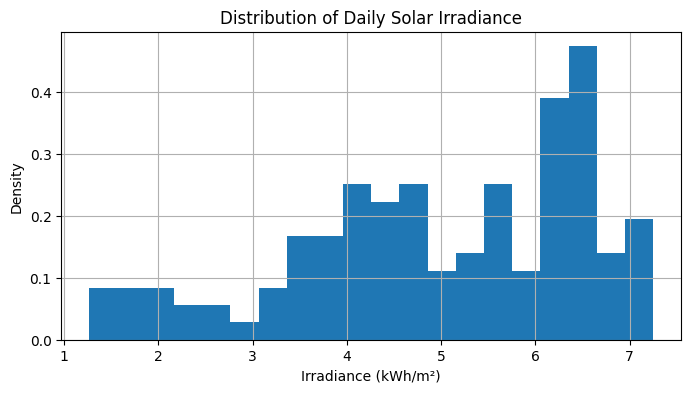

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(solar["irradiance_kwh"], bins=20, density=True)
plt.title("Distribution of Daily Solar Irradiance")
plt.xlabel("Irradiance (kWh/m²)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

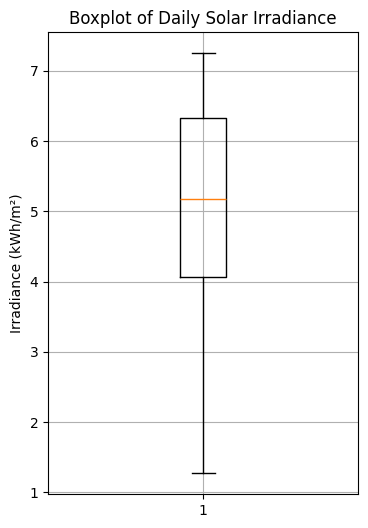

In [8]:
plt.figure(figsize=(4,6))
plt.boxplot(solar["irradiance_kwh"], vert=True)
plt.title("Boxplot of Daily Solar Irradiance")
plt.ylabel("Irradiance (kWh/m²)")
plt.grid(True)
plt.show()

---

## 6. Exercises

### Exercise 1: Generation Variability by Fuel

In this cell, I compute the variance and skewness of daily generation (in MU) for each fuel type.

In [18]:
import pandas as pd

# Load sample CEA generation data
gen = pd.read_csv("../day8/cea_generation.csv")

# Group by fuel_type and compute variance & skewness
gen_variability = gen.groupby("fuel_type")["generation"].agg(
    variance=lambda x: x.var(),
    skewness=lambda x: x.skew()
).reset_index()

print(gen_variability)

  fuel_type      variance  skewness
0     Hydro   7538.991507 -0.454270
1     Solar  18967.525879 -0.412125
2      Wind   8738.216684  1.634270


### Exercise 2: Monthly Irradiance Comparison

In this cell, I group the solar irradiance data by calendar month, compute the mean ± 1 standard deviation, and plot a bar chart with error bars.

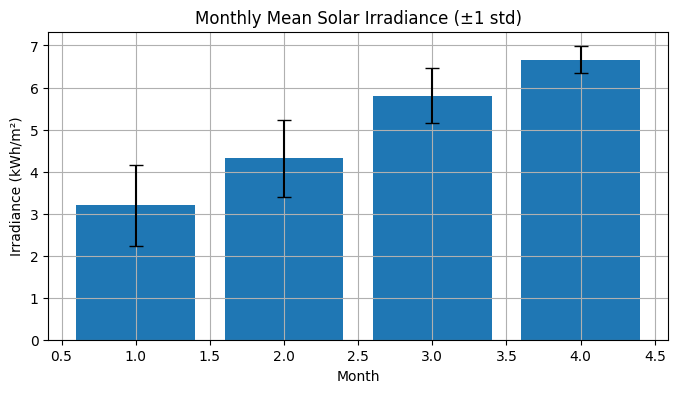

In [19]:
import matplotlib.pyplot as plt

# Load solar irradiance data
solar = pd.read_csv("../../week1/day6/solar_irr.csv", parse_dates=["date"]).set_index("date")

# Compute per‐month mean & std
solar_monthly = solar["irradiance_kwh"].groupby(solar.index.month).agg(
    mean_irradiance=lambda x: x.mean(),
    std_irradiance=lambda x: x.std()
).rename_axis("month").reset_index()

# Plot
plt.figure(figsize=(8, 4))
plt.bar(
    solar_monthly["month"],
    solar_monthly["mean_irradiance"],
    yerr=solar_monthly["std_irradiance"],
    capsize=5
)
plt.title("Monthly Mean Solar Irradiance (±1 std)")
plt.xlabel("Month")
plt.ylabel("Irradiance (kWh/m²)")
plt.grid(True)
plt.show()

### Exercise 3: Outlier Detection via Z‑Scores

In this cell, I identify days where the daily irradiance lies more than 2 standard deviations away from the mean, using the z‑score method.

In [21]:
# Compute mean and standard deviation
mean_irr = solar["irradiance_kwh"].mean()
std_irr  = solar["irradiance_kwh"].std()

# Identify outliers where |z| > 2
outliers_z = solar[
    (solar["irradiance_kwh"] < mean_irr - 2 * std_irr) |
    (solar["irradiance_kwh"] > mean_irr + 2 * std_irr)
]

# Reset index and rename columns for readability
outliers_z = outliers_z.reset_index().rename(
    columns={"date": "Date", "irradiance_kwh": "Irradiance_kWh"}
)

print(f"Mean irradiance: {mean_irr:.2f} kWh/m²")
print(f"Std deviation:   {std_irr:.2f} kWh/m²")
print("\nOutlier days (|z| > 2):")
print(outliers_z)

Mean irradiance: 5.00 kWh/m²
Std deviation:   1.54 kWh/m²

Outlier days (|z| > 2):
        Date  Irradiance_kWh
0 2025-01-01            1.70
1 2025-01-03            1.31
2 2025-01-07            1.39
3 2025-01-18            1.83
4 2025-02-04            1.75
5 2025-02-27            1.27
